# Week 5 Final Report

## Battle of the Neighborhoods

### Opening a Thai Restaurant in New York

***Installing and Importing the required Libraries***

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup # this module helps in web scrapping.
import xml

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


***Scraping the Wikipedia page for the table of postal codes of New York***

In [2]:
List_url = "https://en.wikipedia.org/wiki/New_York_City#Boroughs"
source = requests.get(List_url).text

In [3]:
soup = BeautifulSoup(source, 'xml')

In [4]:
nyc_boroughs = soup.find('table',{'class': 'wikitable sortable'})
# get headers and data and append them into lists
table_rows = nyc_boroughs.find_all('tr')
headers = table_rows[2].text.strip().split('\n')
data = []
for row in table_rows[3:-3]:
    data.append([table_data.text.strip() for table_data in row.find_all('td')])

In [5]:
ny_boroughs_df = pd.DataFrame(data, columns=headers)
ny_boroughs_df

,Borough,County,Estimate (2019),billions(2012 US$),square miles,squarekm,persons /mi2,persons /km2
0,The Bronx,Bronx,"1,418,207",42.695,42.10,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,70.82,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,22.83,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,108.53,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,58.37,151.18,"8,157","3,150"


As per table above, there is 5 boroughs in New York City. Manhattan is the borough which is the highest density of 71,341 per square meter. Other than that, the most pupolous borough is Brooklyn (2,559,903).

***Download and Explore Dataset of New York***

In [6]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [7]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [9]:
neighborhood_data = newyork_data['features']

In [10]:
neighborhood_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

***Confirm new size of dataframe***

In [11]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [12]:
for data in neighborhood_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                        'Neighborhood': neighborhood_name,
                                        'Latitude': neighborhood_lat,
                                        'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [14]:
neighborhoods.shape

(306, 4)

***Use geopy library to get the latitude and longitude values of New York***

In [16]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 40.7127281, -74.0060152.


In [17]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.13.0             |     pyhd8ed1ab_0          97 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    alsa-lib-1.2.3             |       h516909a_0         560 KB  conda-forge
   

In [19]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_newyork)  
    
map_newyork

***Define Foursquare Credentials and Version***

In [20]:
CLIENT_ID = '03O3O3GNPBOM43MDA12EGEF1GKSXXAANNRH4OOLBXAIQS2OQ' # your Foursquare ID
CLIENT_SECRET = 'WW1MIIO0Z0ZNM2Q4FWZYGPUVJEHMC4KIEQCAKJIGFIBKSIXI' # your Foursquare Secret
ACCESS_TOKEN = 'SRUWAOB0M40PYUA1S2C3IIYXF4DWRY2E2N4MYPV5YMEEZMSW' # you r FourSquare Access Token
VERSION = '20210517'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 03O3O3GNPBOM43MDA12EGEF1GKSXXAANNRH4OOLBXAIQS2OQ
CLIENT_SECRET:WW1MIIO0Z0ZNM2Q4FWZYGPUVJEHMC4KIEQCAKJIGFIBKSIXI


***Explore Thai Restaurants in Boroughs of the New York***

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    radius=10000
    LIMIT=100   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
venues_df = getNearbyVenues(names=neighborhoods['Borough'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Manhattan
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manh

In [23]:
print(venues_df.shape)

(30600, 7)


In [24]:
newyork_thai = venues_df[venues_df['Venue Category'] == 'Thai Restaurant']

newyork_thai.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2168,Bronx,40.806239,-73.916100,Enthaice,40.763165,-73.92115,Thai Restaurant
2251,Bronx,40.801664,-73.913221,Enthaice,40.763165,-73.92115,Thai Restaurant
2394,Bronx,40.815099,-73.895788,Enthaice,40.763165,-73.92115,Thai Restaurant
2454,Bronx,40.809730,-73.883315,Enthaice,40.763165,-73.92115,Thai Restaurant
2589,Bronx,40.823592,-73.901506,Enthaice,40.763165,-73.92115,Thai Restaurant


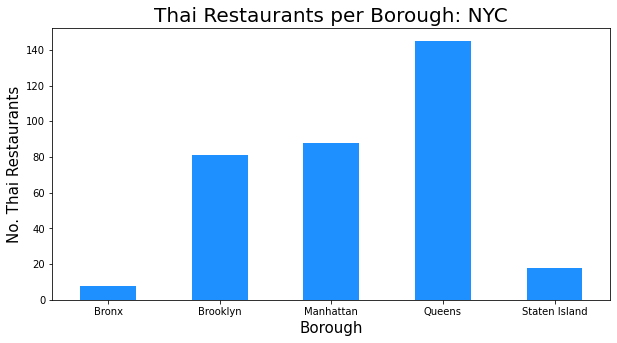

In [25]:
clr = "dodgerblue"
newyork_thai.groupby('Borough')['Venue Category'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Thai Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Thai Restaurants',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

As per table above, Queens has the largest number of Thai Restaurants.

***Explore Thai Restaurants in Neighborhoods of the New York***

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    radius=10000
    LIMIT=100   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
venues_df = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [28]:
print(venues_df.shape)

(30600, 7)


In [29]:
newyork_thai = venues_df[venues_df['Venue Category'] == 'Thai Restaurant']

newyork_thai.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2168,Mott Haven,40.806239,-73.916100,Enthaice,40.763165,-73.92115,Thai Restaurant
2251,Port Morris,40.801664,-73.913221,Enthaice,40.763165,-73.92115,Thai Restaurant
2394,Longwood,40.815099,-73.895788,Enthaice,40.763165,-73.92115,Thai Restaurant
2454,Hunts Point,40.809730,-73.883315,Enthaice,40.763165,-73.92115,Thai Restaurant
2589,Morrisania,40.823592,-73.901506,Enthaice,40.763165,-73.92115,Thai Restaurant


In [30]:
newyork_thai.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arlington,2,2,2,2,2,2
Arverne,1,1,1,1,1,1
Auburndale,1,1,1,1,1,1
Battery Park City,4,4,4,4,4,4
Bay Terrace,2,2,2,2,2,2
Bayside,2,2,2,2,2,2
Bayswater,1,1,1,1,1,1
Bedford Stuyvesant,4,4,4,4,4,4
Beechhurst,1,1,1,1,1,1


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
nythai_t10=newyork_thai.groupby('Neighborhood')['Venue Category'].count().sort_values(ascending=False)[:10].to_frame().reset_index()

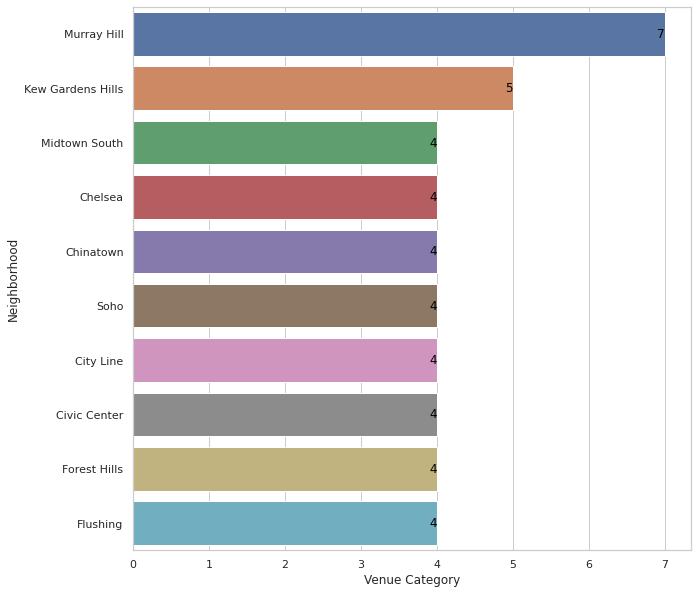

In [33]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='Venue Category', y='Neighborhood', data=nythai_t10)
#ax.annotate(x='Venue')
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), 
            fontsize=12, color='black', ha='right', va='center')

As per table above, College Point of the Queens and Murray Hill of the Manhattan are the neighborhoods in all of New York City with the most Thai Restaurants.

***Let's check how many venues were returned for each neighorhood***

In [34]:
venues_df.groupby(["Neighborhood"]).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,100,100,100,100,100,100
Annadale,100,100,100,100,100,100
Arden Heights,100,100,100,100,100,100
Arlington,100,100,100,100,100,100
Arrochar,100,100,100,100,100,100
Arverne,100,100,100,100,100,100
Astoria,100,100,100,100,100,100
Astoria Heights,100,100,100,100,100,100
Auburndale,100,100,100,100,100,100


In [35]:
print('There are {} uniques categories.'.format(len(venues_df['Venue Category'].unique())))

There are 274 uniques categories.


***Analyze Each Neighborhood***

In [36]:
# one hot encoding
newyork_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

print(newyork_onehot.shape)
newyork_onehot.head()

(30600, 274)


,Zoo Exhibit,African Restaurant,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Community Center,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Himalayan Restaurant,History Museum,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Memorial Site,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Rental Car Location,Rental Service,Reservoir,Resort,Restaurant,Russian Restaurant,Sake Bar,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Stables,State / Provincial Park,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,

***Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category***

In [37]:
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index() 

print(newyork_grouped.shape)

(302, 274)


In [38]:
len(newyork_grouped[newyork_grouped["Thai Restaurant"] > 0])

145

***Create a new DataFrame for Thai Restaurants data only***

In [39]:
nyc_thai = newyork_grouped[["Neighborhood","Thai Restaurant"]]
nyc_thai.head

<bound method NDFrame.head of                   Neighborhood  Thai Restaurant
0                     Allerton            0.000
1                     Annadale            0.000
2                Arden Heights            0.000
3                    Arlington            0.020
4                     Arrochar            0.000
5                      Arverne            0.010
6                      Astoria            0.000
7              Astoria Heights            0.000
8                   Auburndale            0.010
9                   Bath Beach            0.000
10           Battery Park City            0.040
11                   Bay Ridge            0.000
12                 Bay Terrace            0.010
13                  Baychester            0.000
14                     Bayside            0.020
15                   Bayswater            0.010
16                Bedford Park            0.000
17          Bedford Stuyvesant            0.040
18                  Beechhurst            0.010
19        

***Cluster Neighborhood***

Run k-means to cluster the neighborhoods in New York into 3 clusters.

In [40]:
# set number of clusters
kclusters = 3

nyc_clustering = nyc_thai.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_clustering )

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 0, 2, 0, 0, 2, 0], dtype=int32)

In [41]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
nyc_merged = nyc_thai.copy()

# add clustering labels
nyc_merged["Cluster Labels"] = kmeans.labels_

nyc_merged.head()

,Neighborhood,Thai Restaurant,Cluster Labels
0,Allerton,0.00,0
1,Annadale,0.00,0
2,Arden Heights,0.00,0
3,Arlington,0.02,2
4,Arrochar,0.00,0


In [42]:
nyc_merged = nyc_merged.join(neighborhoods.set_index("Neighborhood"), on="Neighborhood")

print(nyc_merged.shape)
nyc_merged.head() # check the last columns!

(306, 6)


,Neighborhood,Thai Restaurant,Cluster Labels,Borough,Latitude,Longitude
0,Allerton,0.00,0,Bronx,40.865788,-73.859319
1,Annadale,0.00,0,Staten Island,40.538114,-74.178549
2,Arden Heights,0.00,0,Staten Island,40.549286,-74.185887
3,Arlington,0.02,2,Staten Island,40.635325,-74.165104
4,Arrochar,0.00,0,Staten Island,40.596313,-74.067124


In [44]:
print(nyc_merged.shape)
nyc_merged.sort_values(["Cluster Labels"], inplace=True)
nyc_merged.head()

(306, 6)


,Neighborhood,Thai Restaurant,Cluster Labels,Borough,Latitude,Longitude
0,Allerton,0.0,0,Bronx,40.865788,-73.859319
40,Butler Manor,0.0,0,Staten Island,40.506082,-74.229504
42,Canarsie,0.0,0,Brooklyn,40.635564,-73.902093
29,Breezy Point,0.0,0,Queens,40.557401,-73.925512
43,Carnegie Hill,0.0,0,Manhattan,40.782683,-73.953256


In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

***Examine Clusters***

In [47]:
# Cluster 0

nyc_merged.loc[nyc_merged['Cluster Labels'] == 0]

,Neighborhood,Thai Restaurant,Cluster Labels,Borough,Latitude,Longitude
0,Allerton,0.000,0,Bronx,40.865788,-73.859319
40,Butler Manor,0.000,0,Staten Island,40.506082,-74.229504
42,Canarsie,0.000,0,Brooklyn,40.635564,-73.902093
29,Breezy Point,0.000,0,Queens,40.557401,-73.925512
43,Carnegie Hill,0.000,0,Manhattan,40.782683,-73.953256
281,Van Nest,0.000,0,Bronx,40.843608,-73.866299
47,Central Harlem,0.000,0,Manhattan,40.815976,-73.943211
48,Charleston,0.000,0,Staten Island,40.530531,-74.232158
38,Bulls Head,0.000,0,Staten Island,40.609592,-74.159409
279,Upper West Side,0.000,0,Manhattan,40.787658,-73.977059


In [48]:
# Cluster 1

nyc_merged.loc[nyc_merged['Cluster Labels'] == 1]

,Neighborhood,Thai Restaurant,Cluster Labels,Borough,Latitude,Longitude
249,Soho,0.040,1,Manhattan,40.722184,-74.000657
55,Clason Point,0.030,1,Bronx,40.806551,-73.854144
227,Rego Park,0.030,1,Queens,40.728974,-73.857827
129,Hillcrest,0.030,1,Queens,40.723825,-73.797603
50,Chinatown,0.040,1,Manhattan,40.715618,-73.994279
159,Lower East Side,0.040,1,Manhattan,40.717807,-73.980890
66,Corona,0.030,1,Queens,40.742382,-73.856825
253,South Jamaica,0.030,1,Queens,40.696911,-73.790426
221,Queens Village,0.030,1,Queens,40.718893,-73.738715
53,Civic Center,0.040,1,Manhattan,40.715229,-74.005415


In [49]:
# Cluster 2

nyc_merged.loc[nyc_merged['Cluster Labels'] == 2]

,Neighborhood,Thai Restaurant,Cluster Labels,Borough,Latitude,Longitude
213,Pomonok,0.01,2,Queens,40.734936,-73.804861
200,Ocean Hill,0.01,2,Brooklyn,40.678403,-73.913068
170,Maspeth,0.01,2,Queens,40.725427,-73.896217
198,Oakland Gardens,0.02,2,Queens,40.745619,-73.754950
192,New Springville,0.01,2,Staten Island,40.594252,-74.164960
183,Mott Haven,0.01,2,Bronx,40.806239,-73.916100
182,Morrisania,0.01,2,Bronx,40.823592,-73.901506
174,Midtown,0.02,2,Manhattan,40.754691,-73.981669
27,Boerum Hill,0.02,2,Brooklyn,40.685683,-73.983748
125,Hammels,0.01,2,Queens,40.587338,-73.805530


***Observation from Clusters***

We can see that most of the thai restaurants are concentrated in the central area and east area of New York City, with the highest number in cluster 1 and moderate number in cluster 0. Besides that, cluster 2 has very low number to almost none of thai restaurants in the those neighborhoods. Most of the neighborhoods in cluster 2 are from The Bronx and Staten Island. 

Therefore, cluster 2 is a great opportunity and high potential areas to open new thai restaurants as there is very little to no competition from existing restaurants. Meanwhile, thai restaurants in cluster 1 are likely suffering from intense competition due to oversupply and high concentration of thai restaurants. 

***Recommendation***

The Bronx would be the best choice to start a Thai Restaurant:

- The third most densely populated county in the New York City (NYC).
- The least amount of thai restaurants per borough
- One of boroughs in Cluster 2 which has the least supply in thai foods. 

    
